In [1]:
import numpy as np 
import matplotlib.pyplot as plt

from helpers import catmullrom3d

In [2]:
# 1d gaussian kernel. 

def gaussiankern(l=5, sigma=1):
    """\
    creates 1d gaussian kernel with side length `l` and a sigma of `sig`
    """
    lags = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)

    gauss = np.exp(np.exp(-0.5 * np.square(lags) / np.square(sigma)))
    kernel = gauss / np.sum(gauss)
    return kernel

In [37]:
def smooth_gaussian(a, l, sigma):
    kernel = gaussiankern(l, sigma)
    half_width = int(l/2)
    b = np.zeros(len(a))
    for i in np.arange(0, len(a)):
        b[i] = kernel @ np.roll(a, -i)[0:l]

    return np.roll(b, half_width)


In [51]:
n = 200
ti = np.linspace(0, 2 * np.pi, n)
eps = 0.2
R = 5
L = 11
sigma = 2
offset = np.random.normal(0, R*eps, n) 
trend = np.sin(ti) / 2
r = 5 + smooth_gaussian(offset, 5, 1)  + trend
b = 1

xi = r* np.cos(ti)
yi = r* np.sin(ti) 

points = np.vstack((xi, yi)).T

xi_smooth = smooth_gaussian(xi, L, sigma)
yi_smooth = smooth_gaussian(yi, L, sigma)

smooth_points =  np.vstack((xi_smooth, yi_smooth)).T


[  0  12  22  33  45  55  65  76  88 101 113 123 135 149 162 185 196   0
  12  22]


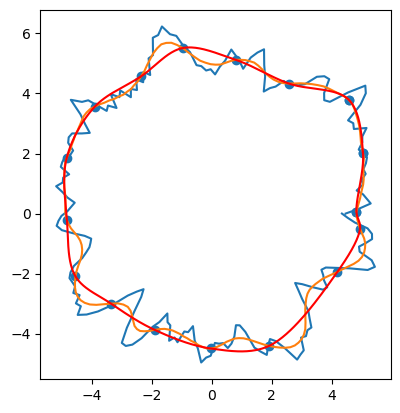

In [53]:
NUM_POINTS = 40

# split by equal length segments. 
t = np.cumsum(np.linalg.norm(np.diff(smooth_points, axis =0), axis =1))
split_indx = np.argwhere(t % 2 < t[-1] / (n+1))[:, 0]

# find the indices - here. 
sorted_split_indx =np.zeros(len(split_indx)+3, dtype=int)
sorted_split_indx[0:-3] = split_indx
sorted_split_indx[-3:] = sorted_split_indx[:3]

# make spline from segments 
split_chain_points: list = catmullrom3d.catmull_rom_chain(smooth_points[sorted_split_indx], NUM_POINTS, is3d=False)
assert len(split_chain_points) == catmullrom3d.num_segments(smooth_points[sorted_split_indx]) * NUM_POINTS  # 400 blue points for this example

print(sorted_split_indx)
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(points[:, 0], points[:, 1])
ax.plot(smooth_points[:, 0], smooth_points[:, 1], color = "C1")

ax.scatter(smooth_points[sorted_split_indx, 0], smooth_points[sorted_split_indx, 1])

ax.plot(*zip(*split_chain_points), c="red")
#ax.plot(5 * np.cos(ti), 5*np.sin(ti), c= "dodgerblue")
ax.set_aspect(aspect="equal")
plt.show()

In [36]:
from helpers.descriptors import Section

In [54]:
gkern_smooth_section = Section(smooth_points, "smooth", False)

In [55]:
gkern_smooth_section.compute_descriptors()

In [56]:
gkern_smooth_section.area

77.26848533782254

In [57]:
rough_section = Section(points, "rough", False)
rough_section.compute_descriptors()

In [58]:
rough_section.area

78.55367435733584

In [59]:
np.pi * 25

78.53981633974483

In [60]:
chain_points = np.vstack(split_chain_points)

In [61]:
catmullrom_section = Section(chain_points, "rough", False)
catmullrom_section.compute_descriptors()

In [62]:
catmullrom_section.area

77.57812955720811